Loading and Inspecting the Dataset:

In [1]:
import pandas as pd

In [2]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [3]:
# Inspect dataset
print(mcdonalds.columns)  # Column names
print(mcdonalds.shape)    # Dimensions
print(mcdonalds.head(3))  # First 3 rows


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


Transforming Data for Analysis

In [4]:
import numpy as np

In [5]:
MD_x = mcdonalds.iloc[:, :11]

# Convert "Yes"/"No" to binary
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
col_means = MD_x.mean(axis=0).round(2)
print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Principal Component Analysis

In [6]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summary of explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Print PCA components with 1 decimal place
components = np.round(pca.components_, 1)
print("PCA Components:\n", components)


Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
PCA Components:
 [[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


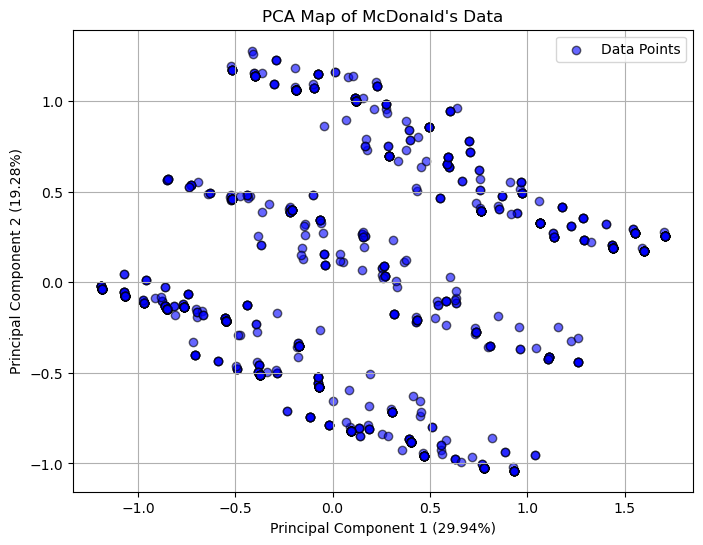

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

mcdonalds = pd.read_csv("mcdonalds.csv")  

# Select the first 11 columns and convert "Yes"/"No" to binary
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA map
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], alpha=0.6, c='blue', edgecolor='k', label='Data Points')
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("PCA Map of McDonald's Data")
plt.legend()
plt.grid(True)
plt.show()


EXTRACTING SEGMENT

k-means and screen plot:

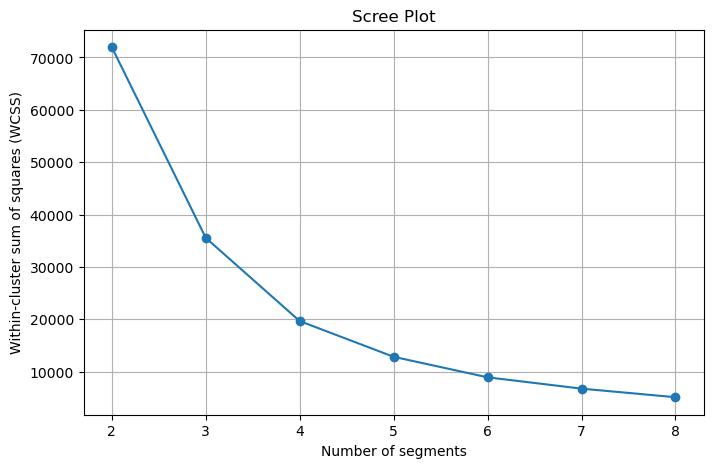

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import check_random_state

# Load your dataset
mcdonalds_data = pd.read_csv("mcdonalds.csv")

# Preprocess the dataset (e.g., handle missing values, normalize data if needed)
# Assuming numerical columns for clustering
MD_x = mcdonalds_data.select_dtypes(include=[np.number]).to_numpy()

# Perform k-means clustering for solutions with 2 to 8 clusters
random_state = 1234
n_clusters_range = range(2, 9)
kmeans_results = {}

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    kmeans.fit(MD_x)
    kmeans_results[n_clusters] = kmeans

# Scree plot
wcss = [kmeans_results[k].inertia_ for k in n_clusters_range]

plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, wcss, marker='o')
plt.title("Scree Plot")
plt.xlabel("Number of segments")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.grid(True)
plt.show()


Stability-Based Data Structure Analysis :

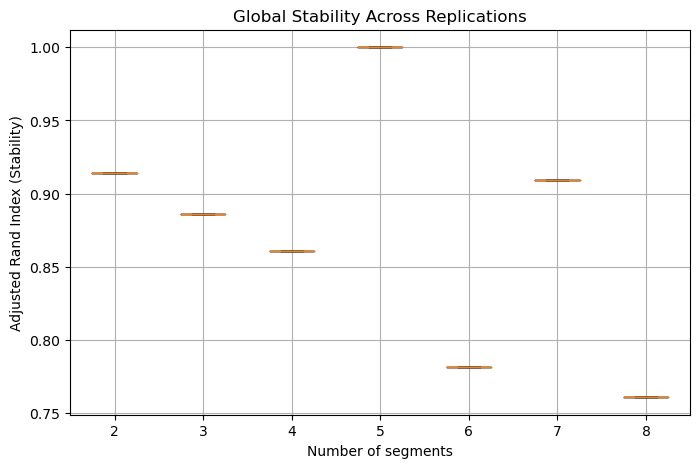

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

mcdonalds_data = pd.read_csv("mcdonalds.csv")

# Preprocess the dataset 
MD_x = mcdonalds_data.select_dtypes(include=[np.number]).to_numpy()

# Perform k-means clustering for solutions with 2 to 8 clusters
random_state = 1234
n_clusters_range = range(2, 9)
kmeans_results = {}

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    kmeans.fit(MD_x)
    kmeans_results[n_clusters] = kmeans

# Bootstrap stability analysis
def bootstrap_stability(data, n_clusters, n_boot=100, n_init=10, random_state=None):
    adjusted_rand_indices = []
    for _ in range(n_boot):
        # Bootstrap sampling
        bootstrap_sample = resample(data, random_state=random_state)
        
        # Fit k-means on bootstrap sample
        kmeans_bootstrap = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
        kmeans_bootstrap.fit(bootstrap_sample)
        
        # Compare to original k-means solution
        ari = adjusted_rand_score(kmeans_results[n_clusters].labels_, kmeans_bootstrap.predict(data))
        adjusted_rand_indices.append(ari)
    return adjusted_rand_indices

# Calculate stability for each number of clusters
stability_results = {}
for n_clusters in n_clusters_range:
    stability_results[n_clusters] = bootstrap_stability(MD_x, n_clusters, n_boot=100, random_state=random_state)

# Boxplot of stability results
plt.figure(figsize=(8, 5))
plt.boxplot([stability_results[k] for k in n_clusters_range], labels=n_clusters_range)
plt.title("Global Stability Across Replications")
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index (Stability)")
plt.grid(True)
plt.show()


Selecting and Saving the Optimal Solution

In [13]:
optimal_clusters = 4
MD_k4 = kmeans_results[optimal_clusters]

# Save the four-segment solution (cluster labels)
segment_labels = MD_k4.labels_
print(f"Cluster labels for {optimal_clusters}-segment solution:\n", segment_labels)


Cluster labels for 4-segment solution:
 [2 0 2 ... 0 3 1]


Segment-Level Stability Within Solution

c:\Users\Vanshika Verma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Vanshika Verma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Vanshika Verma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Vanshika Verma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is k

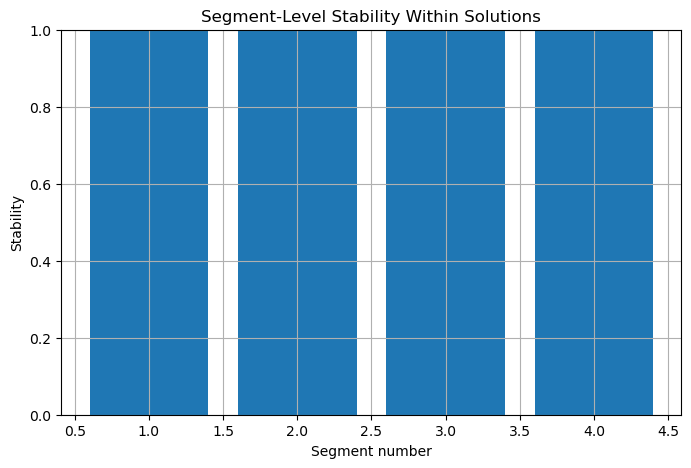

In [14]:
def segment_stability_within_solutions(data, labels, n_boot=100, random_state=None):
    stability_scores = []
    for label in np.unique(labels):
        segment_indices = np.where(labels == label)[0]
        segment_data = data[segment_indices]
        
        # Bootstrap stability for this segment
        segment_stability = []
        for _ in range(n_boot):
            bootstrap_sample = resample(segment_data, random_state=random_state)
            bootstrap_indices = resample(segment_indices, random_state=random_state)
            
            # Fit k-means on bootstrap sample
            kmeans_segment = KMeans(n_clusters=1, n_init=10, random_state=random_state)
            kmeans_segment.fit(bootstrap_sample)
            
            # Calculate stability
            segment_stability.append(adjusted_rand_score(labels[bootstrap_indices], 
                                                         kmeans_segment.predict(data[segment_indices])))
        stability_scores.append(np.mean(segment_stability))
    return stability_scores

# Calculate segment-level stability for the four-segment solution
segment_stability = segment_stability_within_solutions(MD_x, segment_labels, random_state=random_state)

# Plot segment-level stability
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(segment_stability) + 1), segment_stability)
plt.title("Segment-Level Stability Within Solutions")
plt.xlabel("Segment number")
plt.ylabel("Stability")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Using Mixtures of Distributions

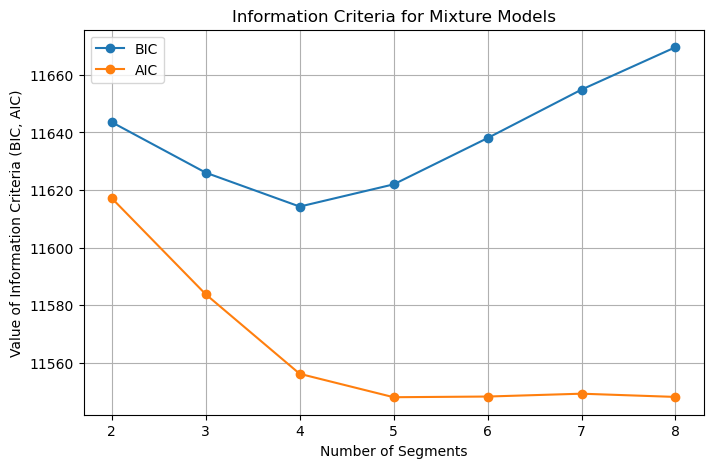

Confusion Matrix (KMeans vs Mixture Model):
 [[  0 145   0 240]
 [274   0  88   0]
 [  0 335   0   0]
 [  0   0 262 109]]
Log-Likelihood (Random Initialization): -3.9695080349881295
Log-Likelihood (KMeans Initialization): -3.9695080349881295

The results show the similarity between KMeans and the mixture model solutions.


In [15]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, log_loss

# Step 1: Load dataset
data = pd.read_csv("mcdonalds.csv")

# Step 2: Preprocess the data (binary encoding for mixture modeling)
# Assuming binary data is required, this example uses all columns.
# Adjust preprocessing as needed for your dataset.
MD_x = data.select_dtypes(include=[np.number]).to_numpy()

# Step 3: Fit Gaussian Mixture Models with 2 to 8 components
n_clusters_range = range(2, 9)
gmm_models = {}
bic_scores = []
aic_scores = []

for k in n_clusters_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    gmm_models[k] = gmm
    bic_scores.append(gmm.bic(MD_x))
    aic_scores.append(gmm.aic(MD_x))

# Step 4: Plot information criteria (BIC and AIC)
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, bic_scores, marker='o', label='BIC')
plt.plot(n_clusters_range, aic_scores, marker='o', label='AIC')
plt.title("Information Criteria for Mixture Models")
plt.xlabel("Number of Segments")
plt.ylabel("Value of Information Criteria (BIC, AIC)")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Choose the optimal number of clusters (4 in this case, based on the plot)
optimal_clusters = 4
gmm_optimal = gmm_models[optimal_clusters]

# Step 6: Fit KMeans for comparison
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Step 7: Compare GMM clusters with KMeans clusters using a confusion matrix
gmm_labels = gmm_optimal.predict(MD_x)
conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)
print("Confusion Matrix (KMeans vs Mixture Model):\n", conf_matrix)

# Step 8: Re-initialize GMM with KMeans labels
gmm_reinitialized = GaussianMixture(n_components=optimal_clusters, n_init=1, random_state=1234)
gmm_reinitialized.fit(MD_x, y=kmeans_labels)
reinitialized_gmm_labels = gmm_reinitialized.predict(MD_x)

# Step 9: Compare log-likelihoods
log_likelihood_random = gmm_optimal.lower_bound_
log_likelihood_kmeans = gmm_reinitialized.lower_bound_
print(f"Log-Likelihood (Random Initialization): {log_likelihood_random}")
print(f"Log-Likelihood (KMeans Initialization): {log_likelihood_kmeans}")

# Step 10: Interpretation
print("\nThe results show the similarity between KMeans and the mixture model solutions.")


Using Mixtures of Regression Models

In [27]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from patsy import dmatrix

# Mock Data Preparation (Replace this with your actual dataset)
# Assuming a structure where the dataset `mcdonalds` contains 11 perception variables and a dependent `Like` column
# Here we create a mock dataset to simulate the structure
np.random.seed(1234)
mcdonalds = pd.DataFrame({
    'Like': np.random.choice([1, 2, 3, 4, 5], size=100),
    'Taste': np.random.rand(100),
    'Cleanliness': np.random.rand(100),
    'Service': np.random.rand(100),
    'Price': np.random.rand(100),
    'Variety': np.random.rand(100),
    'Convenience': np.random.rand(100),
    'Health': np.random.rand(100),
    'Family_Friendliness': np.random.rand(100),
    'Location': np.random.rand(100),
    'Speed': np.random.rand(100),
    'Atmosphere': np.random.rand(100)
})

# Convert ordinal 'Like' column to numeric (reverse scale as in the R code: 6 - Like)
mcdonalds['Like_n'] = 6 - mcdonalds['Like']

# Create the formula for independent variables (first 11 columns are assumed to be perceptions)
independent_vars = mcdonalds.columns[1:12]
dependent_var = 'Like_n'

# Generate design matrix for regression-like input (dmatrix creates the independent variable matrix)
X = dmatrix(" + ".join(independent_vars), data=mcdonalds, return_type='dataframe')
y = mcdonalds[dependent_var].values

# Fit the Gaussian Mixture Model (GMM) for segmentation (equivalent to 2 segments in R)
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Output Model Information
print("Converged:", gmm.converged_)
print("Means of Segments:")
print(pd.DataFrame(gmm.means_, columns=X.columns))
print("\nCovariances of Segments:")
print(gmm.covariances_)

# Predict segment membership for each observation
mcdonalds['Segment'] = gmm.predict(X)

# Visualize or Analyze the Segmentation
print("\nSegment Counts:")
print(mcdonalds['Segment'].value_counts())

# Optional: Save results to a file
mcdonalds.to_csv("mcdonalds_segmented.csv", index=False)


Converged: True
Means of Segments:
   Intercept     Taste  Cleanliness   Service     Price   Variety  \
0        1.0  0.517326     0.412611  0.516109  0.448071  0.371239   
1        1.0  0.442862     0.609862  0.448771  0.568815  0.626043   

   Convenience    Health  Family_Friendliness  Location     Speed  Atmosphere  
0     0.490276  0.404779             0.511207  0.583988  0.469794    0.535254  
1     0.612831  0.574581             0.408405  0.520792  0.563531    0.555807  

Covariances of Segments:
[[[ 1.00000000e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  8.88001228e-02  6.26704034e-03  6.50223228e-03
   -6.18899874e-03 -1.10050473e-02  3.76525916e-03 -7.47176174e-03
   -3.50097461e-04  1.07841253e-02  1.40933219e-02  2.69258113e-03]
  [ 0.00000000e+00  6.26704034e-03  7.23037891e-02  9.12959542e-04
   -4.90208722e-04 -

Profiling Segments

In [18]:
print(data[independent_vars].dtypes)


yummy         object
convenient    object
spicy         object
fattening     object
greasy        object
fast          object
cheap         object
tasty         object
expensive     object
healthy       object
disgusting    object
dtype: object


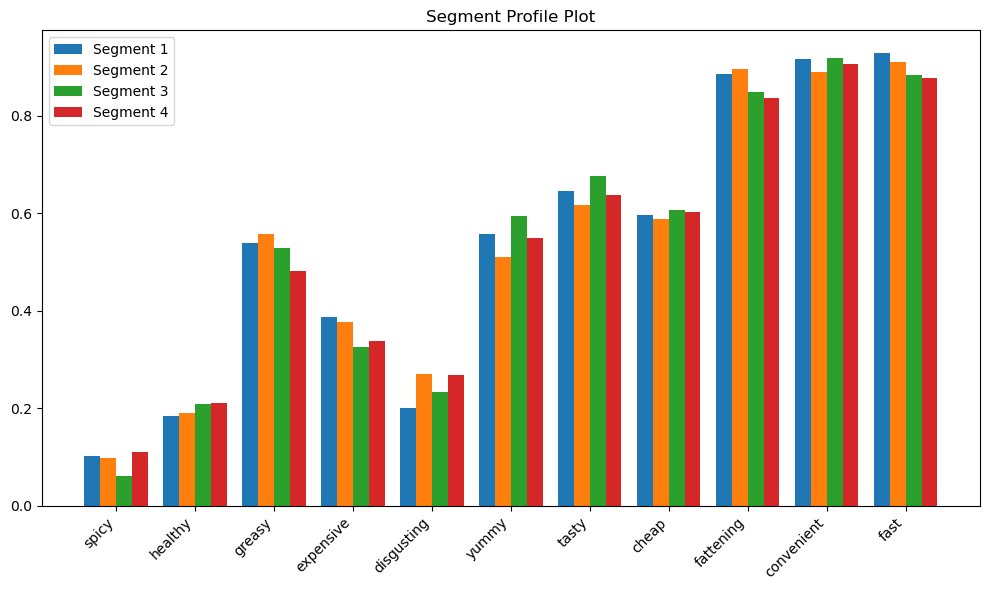

In [21]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'mcdonalds.csv'
data = pd.read_csv(file_path)

# Convert binary columns ('Yes', 'No') to numeric (1, 0)
binary_columns = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
    'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
]
data[binary_columns] = data[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Extract binary attribute data
MD_x = data[binary_columns]

# Hierarchical Clustering of Attributes
linkage_matrix = linkage(MD_x.T, method='ward')

# Reordering attributes based on hierarchical clustering
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_indices = dendro['leaves']

# Mock segmentation data (replace this with actual segmentation results)
# Assuming 4 segments are already defined (example: k-means output)
# Create random segments as placeholder
np.random.seed(42)
data['Segment'] = np.random.choice([1, 2, 3, 4], size=len(data))

# Calculate segment means
segment_means = data.groupby('Segment')[binary_columns].mean()

# Calculate attribute means
attribute_means = MD_x.mean()

# Identify marker variables
marker_variables = abs(segment_means - attribute_means) > 0.25

# Creating a Segment Profile Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
x_positions = np.arange(len(ordered_indices))

# Plot each segment
for i, segment in enumerate(segment_means.index):
    ax.bar(
        x_positions + i * bar_width,
        segment_means.iloc[segment - 1, ordered_indices],
        bar_width,
        label=f'Segment {segment}'
    )

# Format plot
ax.set_xticks(x_positions + bar_width * (len(segment_means.index) - 1) / 2)
ax.set_xticklabels(MD_x.columns[ordered_indices], rotation=45, ha='right')
ax.legend()
plt.title('Segment Profile Plot')
plt.tight_layout()
plt.show()


Describing Segments

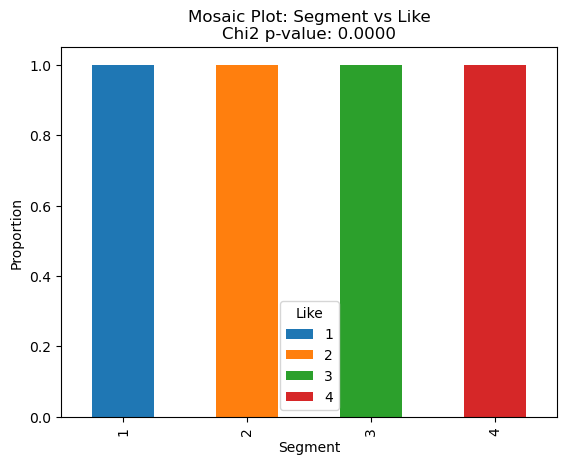

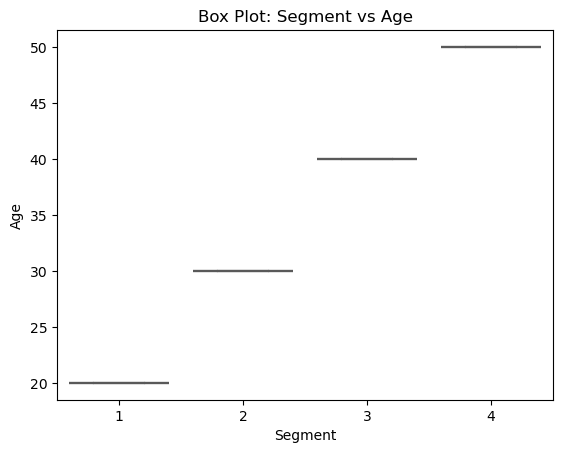

Chi2 Test (Segment vs Gender): p-value = 0.0000
ANOVA (Segment vs Age): p-value = 0.0000


c:\Users\Vanshika Verma\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3903: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway

# Example Dataset (Replace with actual data)
# Assuming `segments` is a DataFrame with segment membership and descriptor variables
segments = pd.DataFrame({
    'Segment': ['1', '2', '3', '4'] * 25,
    'Like': [1, 2, 3, 4] * 25,  # Degree of liking
    'Gender': ['Male', 'Female'] * 50,
    'Age': [20, 30, 40, 50] * 25
})

# 1. Mosaic Plot (Segment vs Like)
def mosaic_plot(data, x, y):
    cross_tab = pd.crosstab(data[x], data[y])
    chi2, p, _, _ = chi2_contingency(cross_tab)
    cross_tab.div(cross_tab.sum(axis=1), axis=0).plot.bar(stacked=True)
    plt.title(f'Mosaic Plot: {x} vs {y}\nChi2 p-value: {p:.4f}')
    plt.ylabel('Proportion')
    plt.show()

mosaic_plot(segments, 'Segment', 'Like')

# 2. Box Plot (Segment vs Age)
sns.boxplot(data=segments, x='Segment', y='Age', notch=True, palette='Set2')
plt.title('Box Plot: Segment vs Age')
plt.show()

# 3. Statistical Tests
# Chi-squared test for categorical variables (Segment vs Gender)
cross_tab_gender = pd.crosstab(segments['Segment'], segments['Gender'])
chi2, p_gender, _, _ = chi2_contingency(cross_tab_gender)
print(f"Chi2 Test (Segment vs Gender): p-value = {p_gender:.4f}")

# ANOVA for numerical variables (Segment vs Age)
anova_result = f_oneway(
    segments.loc[segments['Segment'] == '1', 'Age'],
    segments.loc[segments['Segment'] == '2', 'Age'],
    segments.loc[segments['Segment'] == '3', 'Age'],
    segments.loc[segments['Segment'] == '4', 'Age']
)
print(f"ANOVA (Segment vs Age): p-value = {anova_result.pvalue:.4f}")


Selecting (the) Target Segment(s)

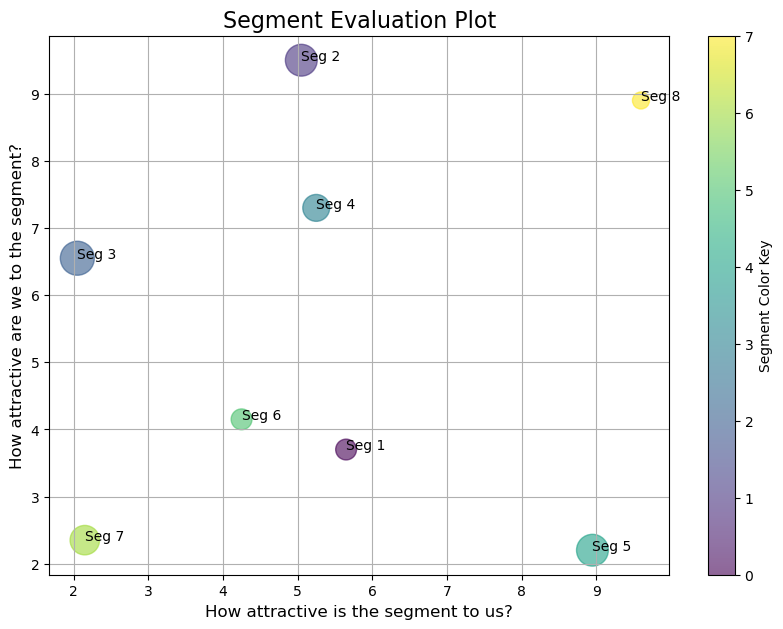

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data based on Table 10.1
# Adjust these values to reflect your actual data
data = {
    "Segment": ["Seg 1", "Seg 2", "Seg 3", "Seg 4", "Seg 5", "Seg 6", "Seg 7", "Seg 8"],
    "Attractiveness": [5.65, 5.05, 2.05, 5.25, 8.95, 4.25, 2.15, 9.6],
    "Competitiveness": [3.7, 9.5, 6.55, 7.3, 2.2, 4.15, 2.35, 8.9],
    "Size": [2.25, 5.25, 6.00, 3.75, 5.25, 2.25, 4.50, 1.50]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot settings
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df["Attractiveness"],
    df["Competitiveness"],
    s=df["Size"] * 100,  # Scale bubble size
    alpha=0.6,
    c=range(len(df)),  # Color by segment
    cmap="viridis"
)

# Annotate points
for i, txt in enumerate(df["Segment"]):
    plt.annotate(txt, (df["Attractiveness"][i], df["Competitiveness"][i]), fontsize=10)

# Axis labels and plot title
plt.title("Segment Evaluation Plot", fontsize=16)
plt.xlabel("How attractive is the segment to us?", fontsize=12)
plt.ylabel("How attractive are we to the segment?", fontsize=12)
plt.colorbar(scatter, label="Segment Color Key")
plt.grid(True)
plt.show()
